In [1]:
# Imports
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
table = "new_db_Feb2023.csv"
opened = open(table,"r")
readed = pd.read_csv(table, sep=",", na_filter=True)
readed = readed.fillna(-3333)
print(readed)

         Unnamed: 0        source_name cadence       tmin       tmax  \
0                 0  4FGL J0001.2-0747   daily  239587201  239846401   
1                 1  4FGL J0001.5+2113   daily  239587201  239846401   
2                 2  4FGL J0003.3-1928   daily  239587201  239846401   
3                 3  4FGL J0004.3+4614   daily  239587201  239846401   
4                 4  4FGL J0004.4-4737   daily  239587201  239846401   
...             ...                ...     ...        ...        ...   
4132745     4132745  4FGL J2358.0-4601  weekly  698630401  699235201   
4132746     4132746  4FGL J2358.3-1021  weekly  698630401  699235201   
4132747     4132747  4FGL J2358.3+3830  weekly  698630401  699235201   
4132748     4132748  4FGL J2359.0+3922  weekly  698630401  699235201   
4132749     4132749  4FGL J2359.2-3134  weekly  698630401  699235201   

         photon_flux2  photon_flux_error2  photon_index2  return_code2  \
0        2.720000e-08        3.300000e-08           2.18     

In [3]:
cadence = 'weekly'

In [4]:
cadence_df = readed.loc[(readed['cadence'] == cadence) #& \
                        # (readed['ts2'] <= 4.) & \
                        # (readed['photon_flux_error2'] <  readed['photon_flux2'])
                        ]
cadence_df.loc[cadence_df['ts2'] <= 4., 'photon_flux2'] = -3333
cadence_df.loc[cadence_df['photon_flux_error2'] < cadence_df['photon_flux2'], 'photon_flux2'] = -3333
print(cadence_df)

TSTART = np.amin(cadence_df['tmin'])
TSTOP = np.amax(cadence_df['tmax'])

         Unnamed: 0        source_name cadence       tmin       tmax  \
3050           3050  4FGL J0001.2-0747  weekly  239587201  240192001   
3051           3051  4FGL J0001.5+2113  weekly  239587201  240192001   
3052           3052  4FGL J0003.3-1928  weekly  239587201  240192001   
3053           3053  4FGL J0004.3+4614  weekly  239587201  240192001   
3054           3054  4FGL J0004.4-4737  weekly  239587201  240192001   
...             ...                ...     ...        ...        ...   
4132745     4132745  4FGL J2358.0-4601  weekly  698630401  699235201   
4132746     4132746  4FGL J2358.3-1021  weekly  698630401  699235201   
4132747     4132747  4FGL J2358.3+3830  weekly  698630401  699235201   
4132748     4132748  4FGL J2359.0+3922  weekly  698630401  699235201   
4132749     4132749  4FGL J2359.2-3134  weekly  698630401  699235201   

         photon_flux2  photon_flux_error2  photon_index2  return_code2  \
3050          -3333.0       -3.333000e+03       -3333.00     

In [5]:
names = np.unique(readed['source_name']) #.drop_duplicates(subset=['source_name'], inplace=False)#[1]
print(names, len(names))

['4FGL J0001.2-0747' '4FGL J0001.5+2113' '4FGL J0003.3-1928' ...
 '4FGL J2358.3-1021' '4FGL J2359.0+3922' '4FGL J2359.2-3134'] 1525


In [6]:
from fractional_variability import fvar, fvar_percent
from fermi_catalog import select_bll, select_fsrq, select_bcu, select_allblazars

In [7]:
fsrq_df = select_fsrq()
# ...
fsrq_names = fsrq_df['Source_Name']

fsrq_fmatrix = []
fsrq_fractionalflux = []
for i, fsrq in enumerate(fsrq_names):
    print(i, fsrq)
    source_array = cadence_df.loc[cadence_df['source_name'] == fsrq]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    flux_err = np.array(source_array[source_array['photon_flux2']!=-3333]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    fsrq_fmatrix.append(factors.tolist())
    fsrq_fractionalflux.append([fsrq, averageflux, var, var_err])

fsrq_fmatrix = np.array(fsrq_fmatrix)


-----------------------------
Selecting FSRQ type blazars
Total number of variable objects: 572
0 4FGL J0001.5+2113
1 4FGL J0004.3+4614
2 4FGL J0004.4-4737
3 4FGL J0005.9+3824
4 4FGL J0010.6+2043
5 4FGL J0010.6-3025
6 4FGL J0011.4+0057
7 4FGL J0016.2-0016
8 4FGL J0017.5-0514
9 4FGL J0019.6+7327
10 4FGL J0023.7-6820
11 4FGL J0023.7+4457
12 4FGL J0024.7+0349
13 4FGL J0028.4+2001
14 4FGL J0030.3-4224
15 4FGL J0038.2-2459
16 4FGL J0043.8+3425
17 4FGL J0044.2-8424
18 4FGL J0045.1-3706
19 4FGL J0047.9+2233
20 4FGL J0050.0-5736
21 4FGL J0050.4-0452
22 4FGL J0051.1-0648
23 4FGL J0051.5-4220
24 4FGL J0058.0-0539
25 4FGL J0058.4+3315
26 4FGL J0102.4+4214
27 4FGL J0102.8+5824
28 4FGL J0104.8-2416
29 4FGL J0108.6+0134
30 4FGL J0109.7+6133
31 4FGL J0112.0-6634
32 4FGL J0112.8+3208
33 4FGL J0113.1-3553
34 4FGL J0113.4+4948
35 4FGL J0115.1-0129
36 4FGL J0116.0-1136
37 4FGL J0117.8-2109
38 4FGL J0118.9-2141
39 4FGL J0126.0-2221
40 4FGL J0128.5+4440
41 4FGL J0132.7-1654
42 4FGL J0133.1-5201
43 4FGL J01

In [8]:
bll_df = select_bll()
# ...
bll_names = bll_df['Source_Name']

bll_fmatrix = []
bll_fractionalflux = []
for i, bll in enumerate(bll_names):
    print(i, bll)
    source_array = cadence_df.loc[cadence_df['source_name'] == bll]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux2'])
    flux_err = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    bll_fmatrix.append(factors.tolist())
    bll_fractionalflux.append([bll, averageflux, var, var_err])

bll_fmatrix = np.array(bll_fmatrix)


-----------------------------
Selecting BL Lac type blazars
Total number of variable objects: 477
0 4FGL J0001.2-0747
[2.33e-09 1.31e-09 1.14e-08 1.34e-09 1.63e-08 4.62e-09 1.23e-08 8.27e-09
 2.25e-08 5.21e-09 3.44e-09 6.67e-08 5.91e-09 1.45e-08 2.22e-08 6.61e-09
 2.42e-08 8.50e-09 2.00e-09 1.88e-09 1.84e-09 2.58e-09 6.92e-09 9.28e-08
 1.74e-09 3.04e-09 8.16e-09 5.43e-09 1.24e-09 3.05e-09 5.69e-08 1.90e-08
 1.39e-08 1.00e-07 9.14e-09 2.00e-07 7.80e-09 2.50e-09 5.64e-09 9.46e-08
 8.58e-09 1.47e-08 3.06e-09 2.60e-08 7.47e-09 2.95e-08 1.28e-08 1.05e-08
 4.38e-09 2.44e-08 7.35e-09 8.35e-08 7.50e-09 2.46e-09 2.45e-09 3.07e-09
 2.10e-08 1.21e-08 3.37e-08 2.09e-09 2.04e-08 2.07e-09 1.57e-09 7.26e-09
 1.81e-08 1.50e-09 2.07e-09 1.57e-09 4.21e-09 6.18e-09] [3.42e-09 5.93e-09 1.19e-08 1.35e-09 1.66e-08 8.25e-09 1.94e-08 1.11e-08
 2.50e-08 5.92e-09 4.71e-09 9.34e-07 8.35e-09 1.53e-08 2.24e-08 9.09e-09
 2.71e-08 1.18e-08 2.10e-09 2.12e-09 2.00e-09 4.07e-09 9.04e-09 1.29e-07
 2.27e-09 4.09e-09 8.80

/var/folders/c_/m9xq6z1d7ng4l884vymz4c240000gq/T/ipykernel_95953/3643097995.py:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("bone").copy()
  cmap.set_bad('Black',1.)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/

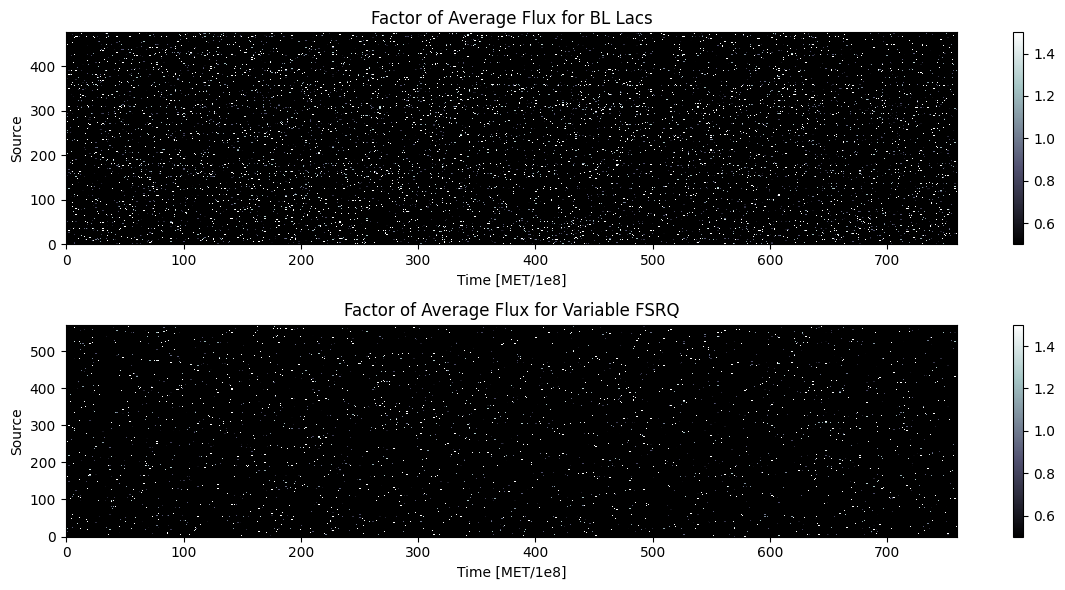

In [9]:
import matplotlib
cmap = matplotlib.cm.bone
cmap.set_bad('Black',1.)

fig, ax = plt.subplots(2, 1, figsize=(12,6), sharex=True, )
cax1 = ax[0].imshow(bll_fmatrix, aspect='auto', interpolation='nearest', origin='lower', cmap='bone')#, extent=[TSTART/1e8, TSTOP/1e8, 0, len(bll_fmatrix)])
cax2 = ax[1].imshow(fsrq_fmatrix, aspect='auto', interpolation='nearest', origin='lower', cmap='bone')#, extent=[TSTART/1e8, TSTOP/1e8, 0, len(bll_fmatrix)])

cax1.set_clim(0.5,1.5)
cax2.set_clim(0.5,1.5)

plt.colorbar(cax1, ax=ax[0])
plt.colorbar(cax2, ax=ax[1])

ax[0].set_title("Factor of Average Flux for BL Lacs")
ax[0].set_xlabel("Time [MET/1e8]")
ax[0].set_ylabel("Source")
ax[1].set_title("Factor of Average Flux for Variable FSRQ")
ax[1].set_xlabel("Time [MET/1e8]")
ax[1].set_ylabel("Source")

ax[0].xaxis.set_ticks_position('bottom')
ax[1].xaxis.set_ticks_position('bottom')
fig.tight_layout()


In [47]:
fsrq_fractionalfluxT = np.array(fsrq_fractionalflux).T
bll_fractionalfluxT = np.array(bll_fractionalflux).T

bll_var = np.sort(bll_fractionalfluxT[-2].astype(float))
bll_varerr = bll_fractionalfluxT[-1].astype(float)

fsrq_var = np.sort(fsrq_fractionalfluxT[-2].astype(float))
fsrq_varerr = fsrq_fractionalfluxT[-1].astype(float)

print(len(bll_var), len(bll_var), len(fsrq_var))

477 477 572


Text(0.5, 0, 'Source')

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpecte

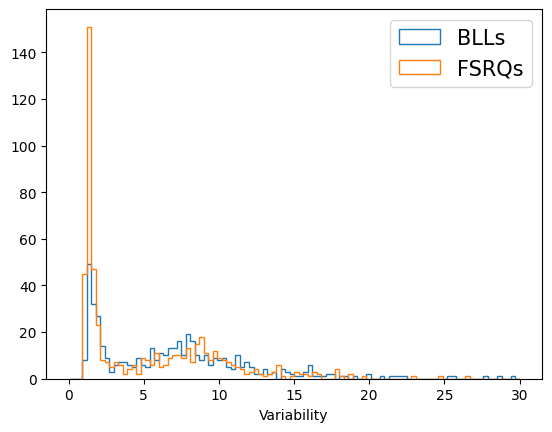

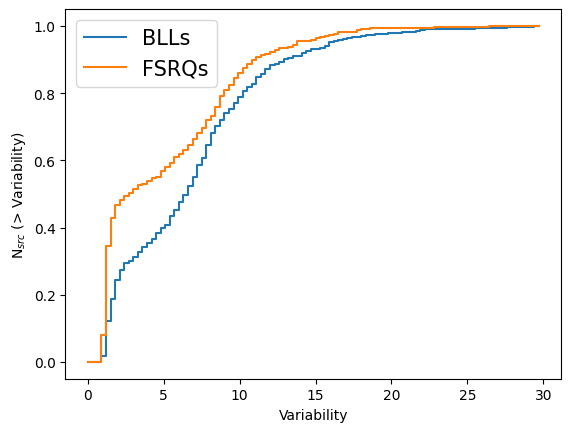

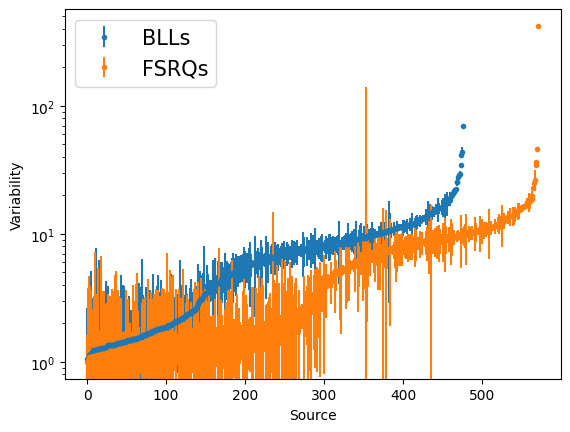

In [66]:
plt.figure()
bllh, bllhx, bllp = plt.hist((bll_var), bins=100, range=(0, 30), histtype='step', label='BLLs')
fsrqh, fsrqhx, fsrqp = plt.hist(fsrq_var, bins=100, range=(0, 30), histtype='step', label='FSRQs')
plt.legend(fontsize=15)
plt.xlabel('Variability')

plt.figure()
plt.step(bllhx[:-1], np.cumsum(bllh) / np.sum(bllh), where='post', label='BLLs')
plt.step(fsrqhx[:-1], np.cumsum(fsrqh) / np.sum(fsrqh), where='post', label='FSRQs')
plt.legend(fontsize=15)
plt.xlabel('Variability')
plt.ylabel(r'N$_{src}$ (> Variability)')

plt.figure()
plt.errorbar(np.arange(len(bll_var)), bll_var, yerr=bll_varerr, fmt='.', label='BLLs')
plt.errorbar(np.arange(len(fsrq_var)), fsrq_var, yerr=fsrq_varerr, fmt='.', label='FSRQs')
plt.legend(fontsize=15)
plt.yscale('log')
plt.ylabel('Variability')
plt.xlabel('Source')


In [ ]:
fsrq_df = select_fsrq()
# ...
fsrq_names = fsrq_df['Source_Name']

fsrq_fmatrix = []
fsrq_fractionalflux = []
for i, fsrq in enumerate(fsrq_names):
    print(i, fsrq)
    source_array = cadence_df.loc[cadence_df['source_name'] == fsrq]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    # num_valid_points = len(source_array[source_array['photon_flux2']!=-3333])
    
    flux = np.array(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    flux_err = np.array(source_array[source_array['photon_flux2']!=-3333]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    fsrq_fmatrix.append(factors.tolist())
    fsrq_fractionalflux.append([fsrq, averageflux, var, var_err])

fsrq_fmatrix = np.array(fsrq_fmatrix)


-----------------------------
Selecting FSRQ type blazars
Total number of variable objects: 572
0 4FGL J0001.5+2113
1 4FGL J0004.3+4614
2 4FGL J0004.4-4737
3 4FGL J0005.9+3824
4 4FGL J0010.6+2043
5 4FGL J0010.6-3025
6 4FGL J0011.4+0057
7 4FGL J0016.2-0016
8 4FGL J0017.5-0514
9 4FGL J0019.6+7327
10 4FGL J0023.7-6820
11 4FGL J0023.7+4457
12 4FGL J0024.7+0349
13 4FGL J0028.4+2001
14 4FGL J0030.3-4224
15 4FGL J0038.2-2459
16 4FGL J0043.8+3425
17 4FGL J0044.2-8424
18 4FGL J0045.1-3706
19 4FGL J0047.9+2233
20 4FGL J0050.0-5736
21 4FGL J0050.4-0452
22 4FGL J0051.1-0648
23 4FGL J0051.5-4220
24 4FGL J0058.0-0539
25 4FGL J0058.4+3315
26 4FGL J0102.4+4214
27 4FGL J0102.8+5824
28 4FGL J0104.8-2416
29 4FGL J0108.6+0134
30 4FGL J0109.7+6133
31 4FGL J0112.0-6634
32 4FGL J0112.8+3208
33 4FGL J0113.1-3553
34 4FGL J0113.4+4948
35 4FGL J0115.1-0129
36 4FGL J0116.0-1136
37 4FGL J0117.8-2109
38 4FGL J0118.9-2141
39 4FGL J0126.0-2221
40 4FGL J0128.5+4440
41 4FGL J0132.7-1654
42 4FGL J0133.1-5201
43 4FGL J01